In [ ]:
#Beyond Random Forests: More Ensemble Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Let's hide warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml

elec_data = fetch_openml(name='electricity', version=1)

In [4]:
type(elec_data)

sklearn.utils.Bunch

In [5]:
elec_data.details

{'id': '151',
 'name': 'electricity',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['M. Harries', 'J. Gama', 'A. Bifet'],
 'collection_date': '1998-12-05',
 'upload_date': '2014-04-10T02:42:23',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/2419/electricity.arff',
 'file_id': '2419',
 'default_target_attribute': 'class',
 'version_label': '1',
 'tag': ['AzurePilot',
  'concept_drift',
  'electricity',
  'mythbusting_1',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_135',
  'study_14',
  'study_15',
  'study_16',
  'study_20',
  'study_34',
  'study_37',
  'study_41',
  'study_7',
  'study_70',
  'study_99'],
 'visibility': 'public',
 'original_data_url': 'http://www.inescporto.pt/~jgama/ales/ales_5.html',
 'paper_url': 'http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.43.9013',
 'status': 'active',
 'processing_date': '2020-11-20 20:01:19',
 'md5_checksum': '8ca97867d960ae029a

In [6]:
elec_data.data.shape

(45312, 8)

In [7]:
# Displaying feature names

elec_data.feature_names

['date',
 'day',
 'period',
 'nswprice',
 'nswdemand',
 'vicprice',
 'vicdemand',
 'transfer']

In [8]:
# Displaying target name

elec_data.target_names

['class']

In [9]:
# Getting the whole dataframe

elec_df = elec_data.frame

In [10]:
type(elec_df )

pandas.core.frame.DataFrame

In [ ]:
#Exploratory Data Analysis

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(elec_df , test_size=0.25,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 33984 
The size of testing data is: 11328


In [12]:
train_data.head(10)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
27325,0.469846,4,0.276596,0.164705,0.519637,0.011417,0.657949,0.265789,DOWN
28731,0.474227,5,0.574468,0.024919,0.191907,0.001656,0.090886,0.819737,DOWN
8450,0.023141,3,0.042553,0.065270,0.250074,0.003467,0.422915,0.414912,DOWN
36659,0.889385,2,0.744681,0.148193,0.670039,0.009981,0.533402,0.563596,UP
781,0.000708,4,0.276596,0.124204,0.475454,0.003467,0.422915,0.414912,UP
13013,0.428963,7,0.106383,0.055242,0.084647,0.003467,0.422915,0.414912,DOWN
3330,0.009203,1,0.382979,0.045635,0.741892,0.003467,0.422915,0.414912,DOWN
18851,0.446662,2,0.744681,0.183409,0.785034,0.012154,0.757639,0.517105,UP
14838,0.433830,3,0.127660,0.047886,0.141476,0.003467,0.422915,0.414912,DOWN
30462,0.868236,6,0.638298,0.030833,0.702023,0.001963,0.538322,0.674123,UP


In [13]:
# Displaying the last rows 

train_data.tail()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
31962,0.875846,2,0.893617,0.028822,0.427998,0.001288,0.385293,0.813158,DOWN
23452,0.460112,7,0.595745,0.026660,0.369979,0.001774,0.234076,0.621053,DOWN
23775,0.460422,7,0.319149,0.026750,0.373550,0.001813,0.269032,0.564035,DOWN
37135,0.889828,5,0.659574,0.028462,0.555638,0.002021,0.625583,0.248684,DOWN
27098,0.469625,6,0.553191,0.054792,0.514430,0.003712,0.545572,0.229825,UP


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33984 entries, 27325 to 27098
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       33984 non-null  float64 
 1   day        33984 non-null  category
 2   period     33984 non-null  float64 
 3   nswprice   33984 non-null  float64 
 4   nswdemand  33984 non-null  float64 
 5   vicprice   33984 non-null  float64 
 6   vicdemand  33984 non-null  float64 
 7   transfer   33984 non-null  float64 
 8   class      33984 non-null  category
dtypes: category(2), float64(7)
memory usage: 2.1 MB


In [15]:
# Summary stats

train_data.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000
mean,0.498150,0.499211,0.057922,0.424763,0.003445,0.423035,0.500089
std,0.340429,0.294571,0.040195,0.163858,0.008846,0.121087,0.153224
min,0.000000,0.000000,0.000000,0.001190,0.000000,0.000000,0.000000
25%,0.031857,0.234043,0.035247,0.307944,0.002283,0.372087,0.414912
50%,0.456307,0.489362,0.048667,0.442725,0.003467,0.422915,0.414912
75%,0.880581,0.744681,0.074276,0.535704,0.003467,0.469446,0.605263
max,1.000000,1.000000,0.981806,1.000000,1.000000,1.000000,1.000000


In [16]:
# Checking missing values

train_data.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [17]:
# Checking feature correlation

corr = train_data.corr()

<AxesSubplot:>

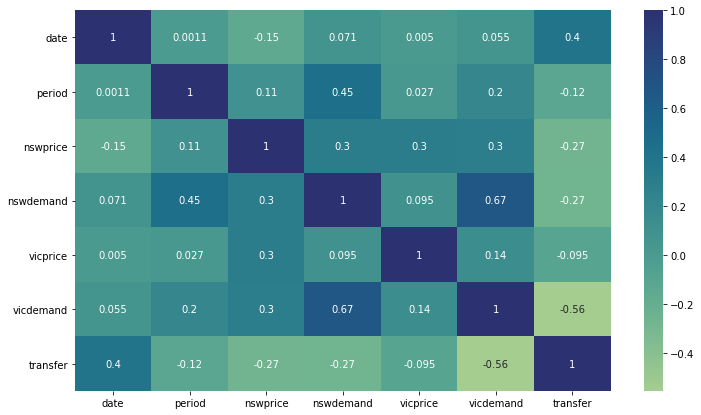

In [18]:
## Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(corr,annot=True,cmap='crest')

<AxesSubplot:xlabel='class', ylabel='count'>

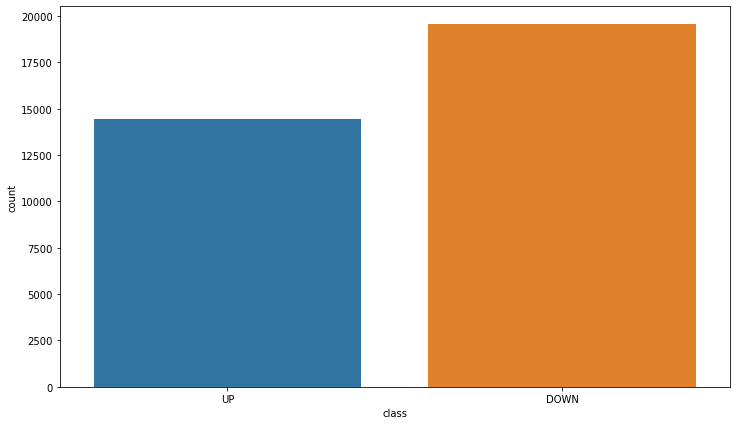

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_data, x='class')

<AxesSubplot:xlabel='day', ylabel='count'>

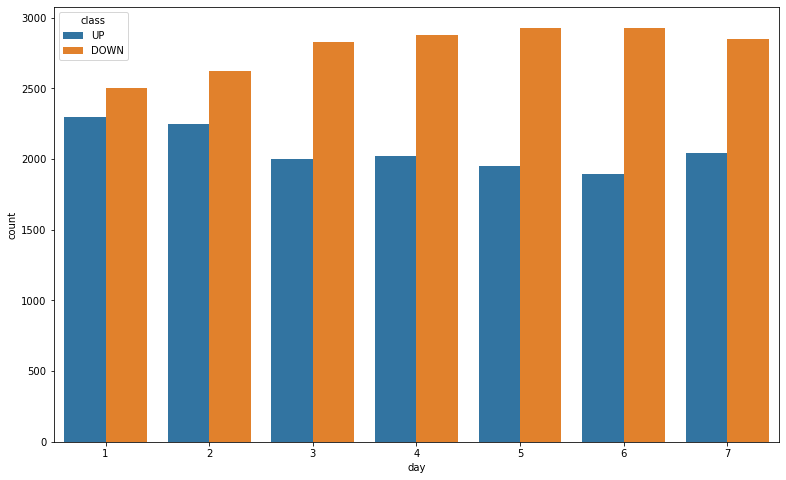

In [20]:
plt.figure(figsize=(13,8))

sns.countplot(data=train_data, x='day', hue='class')

<AxesSubplot:xlabel='vicdemand', ylabel='nswdemand'>

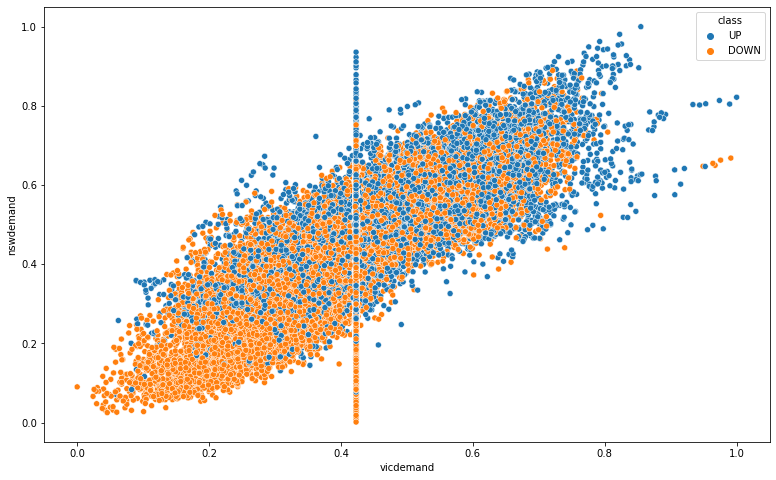

In [21]:
plt.figure(figsize=(13,8))
sns.scatterplot(data=train_data, x='vicdemand', y='nswdemand', hue='class')

<AxesSubplot:xlabel='vicdemand', ylabel='nswdemand'>

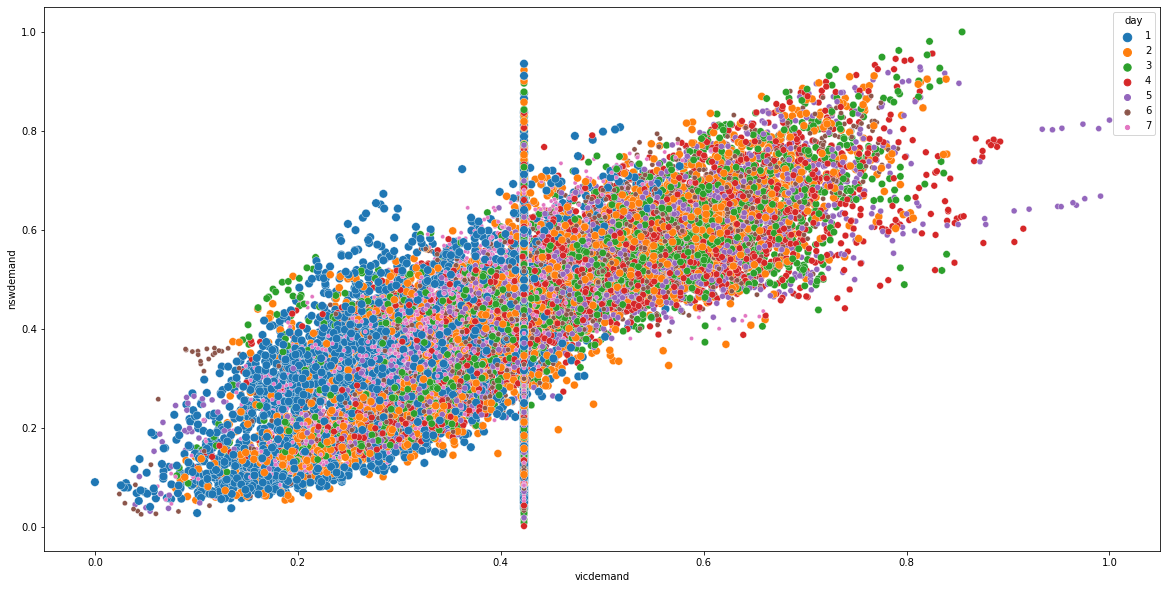

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train_data, x='vicdemand', y='nswdemand', hue='day', size='day')

<AxesSubplot:xlabel='day', ylabel='nswdemand'>

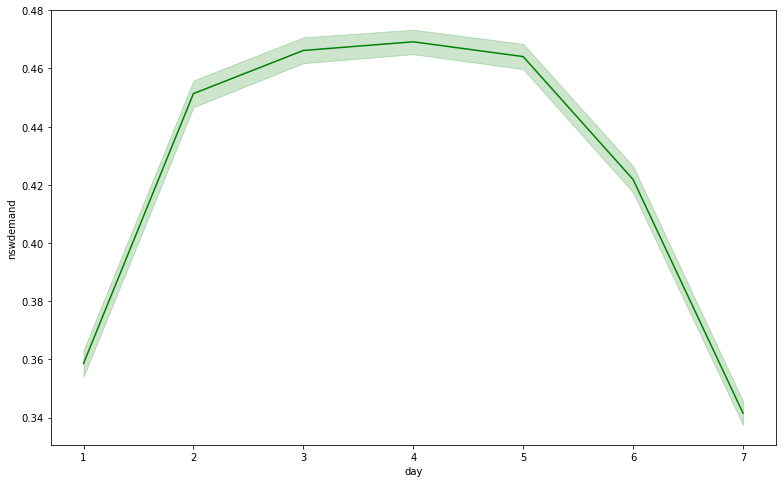

In [23]:
plt.figure(figsize=(13,8))
sns.lineplot(data=train_data, x='day', y='nswdemand', color='green')

<AxesSubplot:xlabel='day', ylabel='vicdemand'>

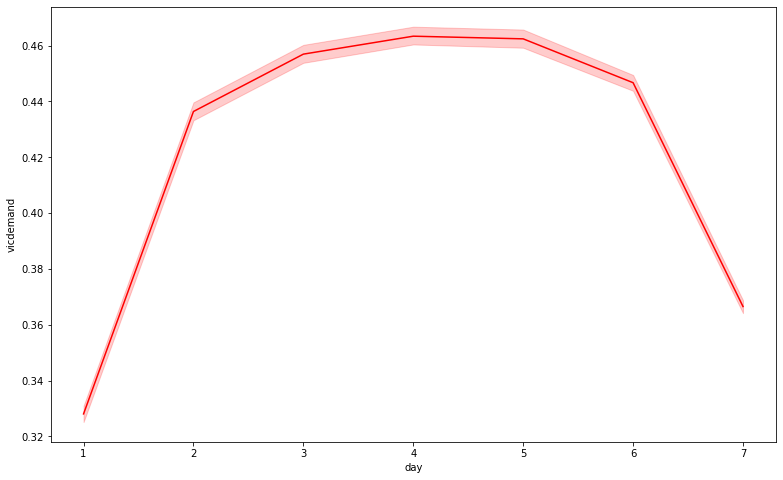

In [24]:
plt.figure(figsize=(13,8))
sns.lineplot(data=train_data, x='day', y='vicdemand', color='red')

<AxesSubplot:xlabel='date', ylabel='nswdemand'>

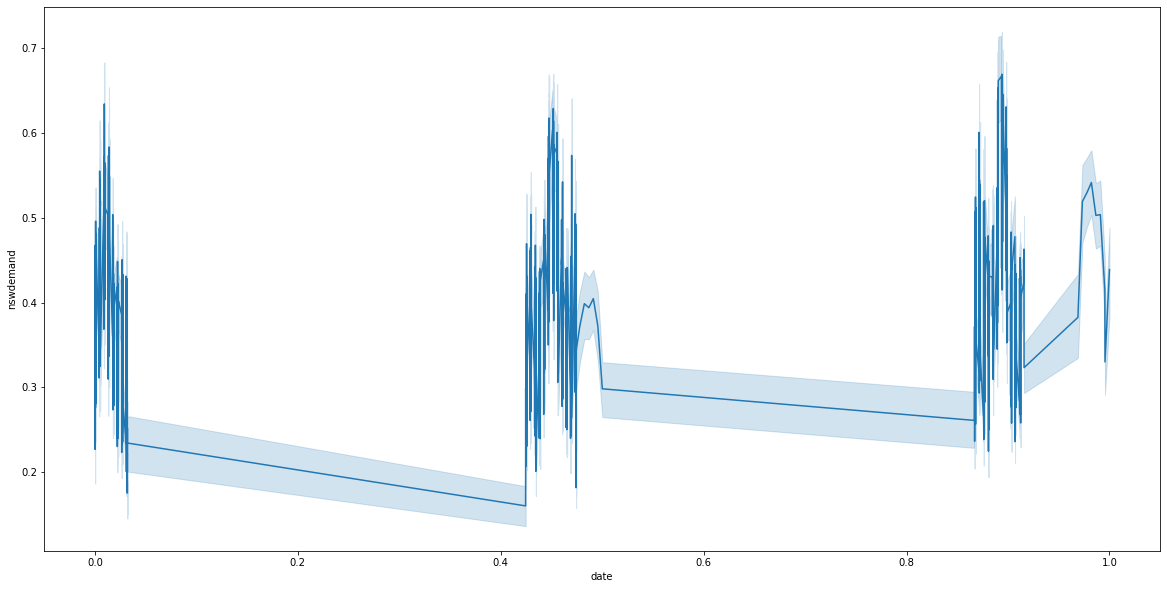

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train_data, x='date', y='nswdemand')

<AxesSubplot:xlabel='date', ylabel='vicdemand'>

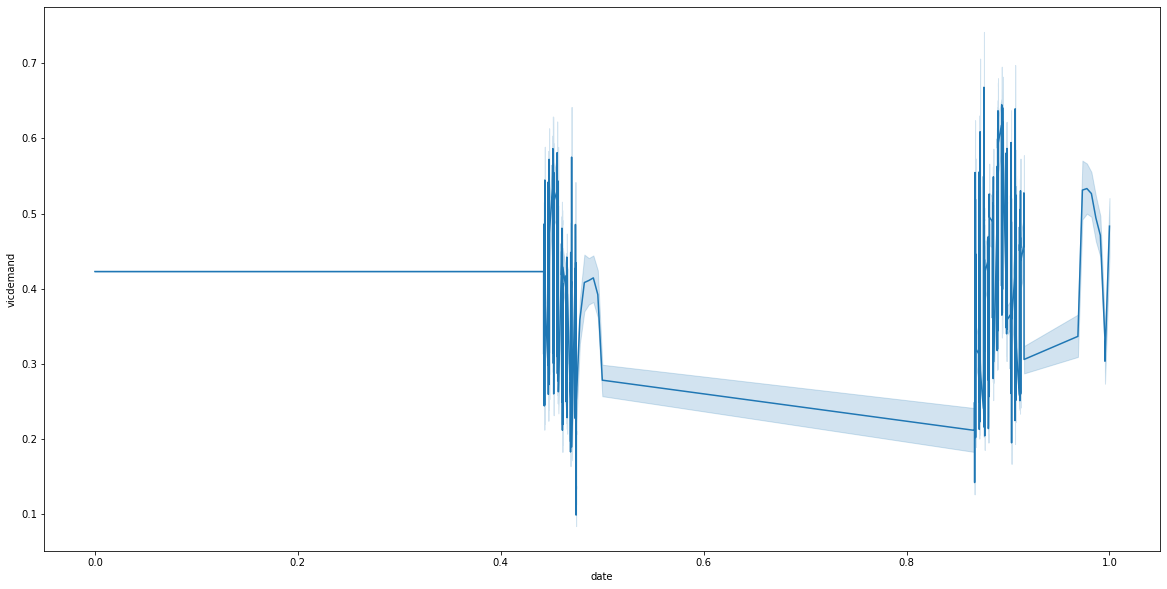

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train_data, x='date', y='vicdemand')

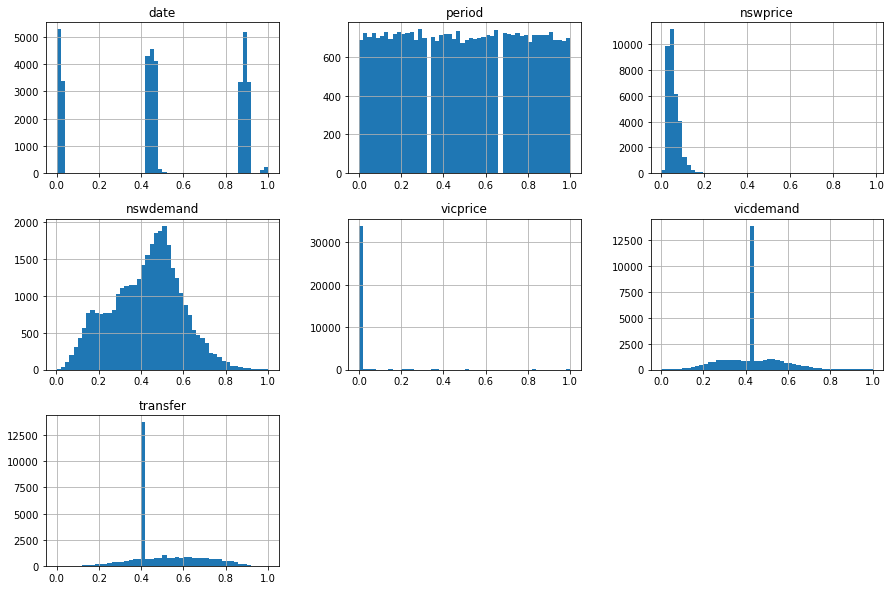

In [27]:
train_data.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
 #Data Preprocessing

In [28]:
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']

In [29]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train_prepared = label_enc.fit_transform(y_train)

In [ ]:
#Training Ensemble Classifiers

In [ ]:
#Voting Classifier

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

log_classifier =  LogisticRegression()
sv_classifier = SVC()
sgd_classifier = SGDClassifier()


def classifiers(clf1, clf2, clf3, X_train, y_train):
    
    """
    A function that takes 5 inputs: 3 classifiers, training data & labels
    And return the list of accuracies on all classifiers
    
    """
    
    # A list of all classifiers
    clfs = [clf1, clf2, clf3]
    
    # An empty list to comprehend 
    all_clfs_acc = []
    
    # Train each classifier, evaluate it on the training set 
    # And append the accuracy to 'all_clfs_acc' 
    
    for clf in clfs:
        
        clf.fit(X_train, y_train)
        preds = clf.predict(X_train)
        acc = accuracy_score(y_train,preds)
        acc = acc.tolist()
        all_clfs_acc.append(acc)
        
    return all_clfs_acc

In [31]:
classifiers(log_classifier,sv_classifier, sgd_classifier, X_train, y_train_prepared)

[0.751088747645951, 0.7368761770244822, 0.7468514595103578]

In [ ]:
# As you can see, the function returned 4 accuracies on the training set. The first accuracy correspond to Logistic Regression, the second is Support Vector Classifier, and the third is SGD(Stockastic Gradient Descent,

# Now, let us use Voting Classifier to aggregate the results of all of those 3 classifiers.

In [32]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(
    
    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)], 
    voting='hard')

vot_classifier.fit(X_train, y_train_prepared)

VotingClassifier(estimators=[('log_reg', LogisticRegression()), ('svc', SVC()),
                             ('sgd', SGDClassifier())])

In [33]:
from sklearn.metrics import accuracy_score

def accuracy(model, data, labels):
    
    predictions = model.predict(data)
    acc = accuracy_score(labels, predictions)
    
    return acc

In [ ]:
#Bagging Classifier

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=False
)

bag_classifier.fit(X_train, y_train_prepared)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  bootstrap=False, max_features=0.5, max_samples=0.5)

In [35]:
accuracy(bag_classifier, X_train, y_train_prepared)

0.9847575329566854

In [ ]:
#Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(
                        n_estimators=500, 
                        learning_rate=0.8, 
                        random_state=42,
                        max_depth=2)

grad_boost_clf.fit(X_train, y_train_prepared)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=42)

In [37]:
accuracy(grad_boost_clf, X_train, y_train_prepared)

0.9269362052730696

In [ ]:
 #AdaBoost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'), 
    #base estimator is decision trees by default
    n_estimators=300,
    learning_rate=0.5

)

adaboost_clf.fit(X_train, y_train_prepared)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300)

In [39]:
accuracy(adaboost_clf, X_train, y_train_prepared)

0.93717631826742

In [ ]:
#Stacking Classifier

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))]

final_estimator = LogisticRegression()

stack_clf = StackingClassifier(estimators = base_estimators, 
                               final_estimator = final_estimator)

stack_clf.fit(X_train, y_train_prepared)

StackingClassifier(estimators=[('rand',
                                RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=LogisticRegression())

In [45]:
accuracy(stack_clf, X_train, y_train_prepared)

0.9996468926553672

In [46]:
#XGBoost

In [47]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train_prepared)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.day

In [ ]:
# Evaluating the Ensemble Model on the Test Set

In [48]:
X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

y_test_prepared = label_enc.transform(y_test)

In [49]:
accuracy(grad_boost_clf, X_test, y_test_prepared)

0.8968926553672316

In [50]:
#Let's also evaluate the stacking classifier. It was overly optimistic on the training data.

In [51]:
accuracy(stack_clf, X_test, y_test_prepared)

0.9021892655367232

In [52]:
#How about trying a bag classifier also? It had nearly 98% on the training data.

In [53]:
accuracy(bag_classifier, X_test, y_test_prepared)

0.8973340395480226